In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

Loading Training Data set placed in root directory

In [3]:
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

The distribution of numerical feature values across the samples....

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.

In [7]:
survived=df['Survived'].value_counts()
classwiseMeanofSurvived=df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(survived)
print(classwiseMeanofSurvived)


0    549
1    342
Name: Survived, dtype: int64
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [6]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [7]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [8]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [10]:
#corealtion
cr=df.corr()['Survived'].sort_values()
cr


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [26]:
df['Age']>70 
df.query(('Age==70') or ('SibSp==5')) 

PassengerId  Survived  Pclass                          Name   Sex   Age  \
672          673         0       2   Mitchell, Mr. Henry Michael  male  70.0   
745          746         0       1  Crosby, Capt. Edward Gifford  male  70.0   

     SibSp  Parch      Ticket  Fare Cabin Embarked  
672      0      0  C.A. 24580  10.5   NaN        S  
745      1      1   WE/P 5735  71.0   B22        S

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [36]:
df[(df['Sex']=='female')].sort_values(by='Fare',ascending=True)

PassengerId  Survived  Pclass                                   Name  \
654          655         0       3           Hegarty, Miss. Hanora "Nora"   
875          876         1       3       Najib, Miss. Adele Kiamie "Jane"   
19            20         1       3                Masselmani, Mrs. Fatima   
780          781         1       3                   Ayoub, Miss. Banoura   
367          368         1       3         Moussa, Mrs. (Mantoura Boulos)   
..           ...       ...     ...                                    ...   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
311          312         1       1             Ryerson, Miss. Emily Borie   
88            89         1       1             Fortune, Miss. Mabel Helen   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
258          259         1       1                       Ward, Miss. Anna   

        Sex   Age  SibSp  Parch    Ticket      Fare            Cabin Embarked  
654  female  18.0      0      0    365226    6.7500              NaN        Q  
875  female  15.0      0      0      2667    7.2250              NaN        C  
19   female   NaN      0      0      2649    7.2250              NaN        C  
780  female  13.0      0      0      2687    7.2292              NaN        C  
367  female   NaN      0      0      2626    7.2292              NaN        C  
..      ...   ...    ...    ...       ...       ...              ...      ...  
742  female  21.0      2      2  PC 17608  262.3750  B57 B59 B63 B66        C  
311  female  18.0      2      2  PC 17608  262.3750  B57 B59 B63 B66        C  
88   female  23.0      3      2     19950  263.0000      C23 C25 C27        S  
341  female  24.0      3      2     19950  263.0000      C23 C25 C27        S  
258  female  35.0      0      0  PC 17755  512.3292              NaN        C  

[314 rows x 12 columns]

In [12]:
cr=df.corr()['Survived'].sort_values()
cr

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [49]:
min_fare = df[(df['Sex']=='female') & (df['Fare']<10)]
min_fare

PassengerId  Survived  Pclass                                  Name  \
2              3         1       3                Heikkinen, Miss. Laina   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
19            20         1       3               Masselmani, Mrs. Fatima   
22            23         1       3           McGowan, Miss. Anna "Annie"   
28            29         1       3         O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                   ...   
797          798         1       3                      Osman, Mrs. Mara   
807          808         0       3       Pettersson, Miss. Ellen Natalia   
816          817         0       3          Heininen, Miss. Wendla Maria   
855          856         1       3            Aks, Mrs. Sam (Leah Rosen)   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   

        Sex   Age  SibSp  Parch            Ticket    Fare Cabin Embarked  
2    female  26.0      0      0  STON/O2. 3101282  7.9250   NaN        S  
14   female  14.0      0      0            350406  7.8542   NaN        S  
19   female   NaN      0      0              2649  7.2250   NaN        C  
22   female  15.0      0      0            330923  8.0292   NaN        Q  
28   female   NaN      0      0            330959  7.8792   NaN        Q  
..      ...   ...    ...    ...               ...     ...   ...      ...  
797  female  31.0      0      0            349244  8.6833   NaN        S  
807  female  18.0      0      0            347087  7.7750   NaN        S  
816  female  23.0      0      0  STON/O2. 3101290  7.9250   NaN        S  
855  female  18.0      0      1            392091  9.3500   NaN        S  
875  female  15.0      0      0              2667  7.2250   NaN        C  

[64 rows x 12 columns]

# Bar plot of Number of Males and Females 

In [51]:

males_rescued_aLive=len(df[(df['Sex']=='male') & (df['Survived']==1)]['Sex'].values)
females_rescued_aLive=len(df[(df['Sex']=='female') & (df['Survived']==1)]['Sex'].values)

y=[males_rescued_aLive, females_rescued_aLive]
x=[1,2]
plt.title("Rescued Alive Males and Females")
labels = ['Males_rescued_aLive','Females_rescued_aLive']
plt.bar(x,y)
plt.xticks(x,labels)
plt.legend(loc='upper right')
plt.show()

In [28]:
males_on_ship=len(df[(df['Sex']=='male')]['Sex'].values)
females_on_ship=len(df[(df['Sex']=='female')]['Sex'].values)


In [29]:
percent_males_survived=males_rescued_aLive/males_on_ship*100
percentfemales_survived=males_rescued_aLive/females_on_ship*100

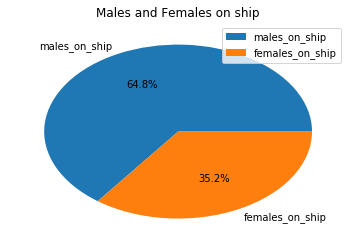

In [30]:
labels=['males_on_ship','females_on_ship']

plt.title("Males and Females on ship")
plt.pie([males_on_ship,females_on_ship],labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

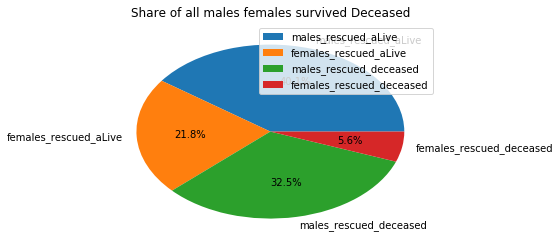

In [31]:
plt.title("Share of all males females survived Deceased")
labels2=['males_rescued_aLive','females_rescued_aLive','males_rescued_deceased','females_rescued_deceased']


plt.pie([males_on_ship,females_on_ship, males_on_ship-males_rescued_aLive, females_on_ship-females_rescued_aLive],labels=labels2, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

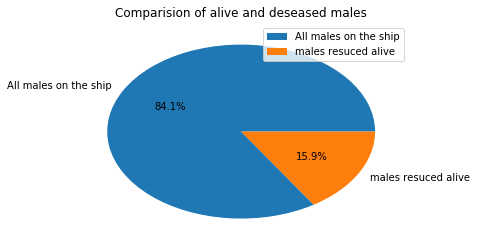

In [32]:
plt.title("Comparision of alive and deseased males")
labels2=['All males on the ship', 'males resuced alive']
plt.pie([males_on_ship,males_rescued_aLive], labels=labels2,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()



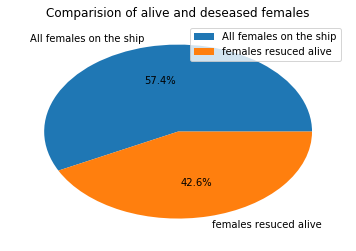

In [33]:
plt.title("Comparision of alive and deseased females")
labels2=['All females on the ship', 'females resuced alive']
plt.pie([females_on_ship,females_rescued_aLive], labels=labels2,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()


# Display All Passengers Age Groupswise with histrogram chart
-All age groups distributed in ten, ten years
-All passengers Data with age groups wise (Blue color)

-All Survived passengers Data plot with (Green Color)

-All Unsurvived passengers data plot with (Red Color)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


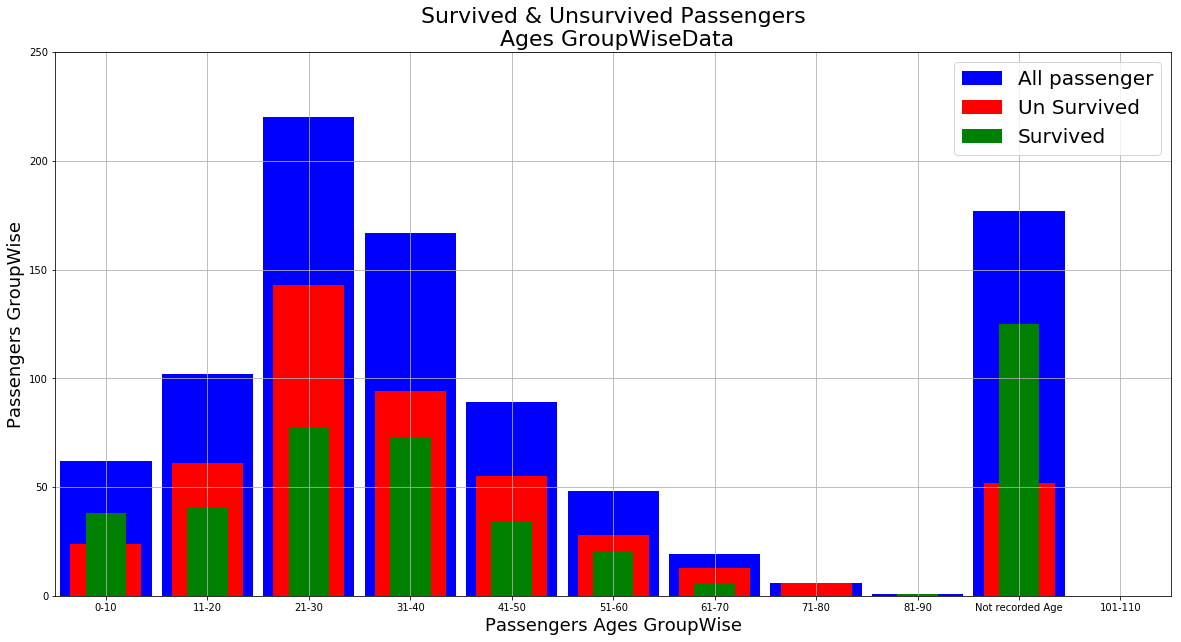

In [38]:
from collections import Counter

adata = df['Age'].values #All passengers data
sdata = df['Age'][(df.Survived==1)].values #All passengers Survived data
udata = df['Age'][(df.Survived==0)].values #All passengers unSurvived data
aNanAgedata = df['Age'].isnull().sum() # All not recorded age passengers
sNanAgedata = df['Age'][(df.Survived==1)].isnull().sum() # All not recorded age passengers survived
uNanAgedata = df['Age'][(df.Survived==0)].isnull().sum() # All not recorded age passengers unsurvived
 
#define function for groping passenger age wise
decile = lambda grade: grade // 10 * 10

allAgesPassengers = Counter(decile(age) for age in adata)
agesPassengersSurvived = Counter(decile(age) for age in sdata)
agesPassengersUnSurvived = Counter(decile(age) for age in udata)

plt.figure(figsize=(20,10))
#allAgesPassengers Data plot
plt.bar([x for x in allAgesPassengers.keys()], # shift each bar to the left by 4
        allAgesPassengers.values(), # give each bar its correct height
        9, color='b', label='All passenger') # give each bar a width of 8

#UnSurvived passenger data plot
plt.bar([x for x in agesPassengersUnSurvived.keys()], # shift each bar to the left by 4
        agesPassengersUnSurvived.values(), # give each bar its correct height
        7, color='r', label='Un Survived') # give each bar a width of 8


#Survived passenger data plot
plt.bar([x for x in agesPassengersSurvived.keys()], # shift each bar to the left by 4
        agesPassengersSurvived.values(), # give each bar its correct height
        4, color='g', label='Survived') # give each bar a width of 8

#Those passengers we have not recorded age
plt.bar(90,aNanAgedata, 9, color='b')
plt.bar(90,sNanAgedata, 7, color='r')
plt.bar(90,uNanAgedata, 4,  color='g')

plt.axis([-5, 105, 0, 250]) # x-axis from -5 to 105,
 # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)],['0-10','11-20','21-30','31-40','41-50','51-60','61-70',
                                       '71-80','81-90','Not recorded Age','101-110']) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Passengers Ages GroupWise", fontsize=18)
plt.ylabel("Passengers GroupWise", fontsize=18)
plt.title("Survived & Unsurvived Passengers\n Ages GroupWiseData", fontsize=22)
plt.grid()
plt.legend(fontsize=20)
plt.show()